# El metodo del codo y el factor de la silueta clustering

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
x1= np.array([3,1,1,3,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2= np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

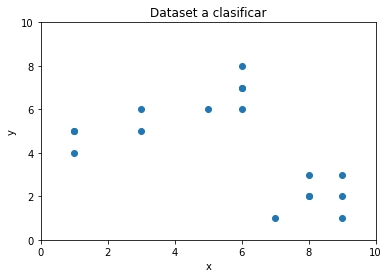

In [6]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

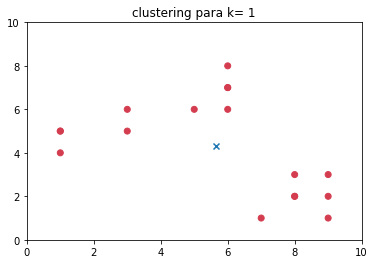

* para k = 2  el promedio de la silueta es de : 0.6146180715766155
  -para i =  1 la silueta del cluster vale : 0.7717202068720556
  -para i =  2 la silueta del cluster vale : 0.5046465768698074


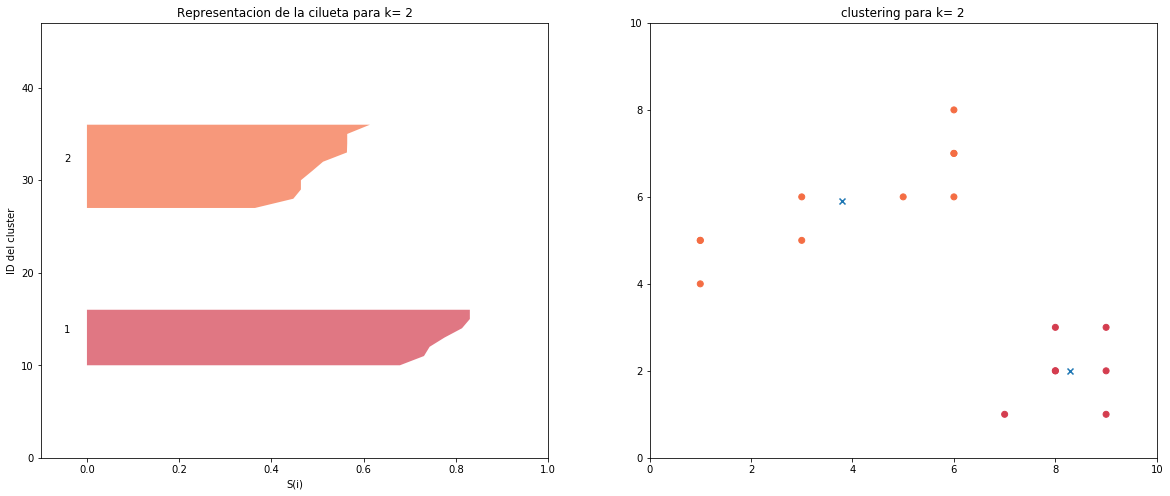

* para k = 3  el promedio de la silueta es de : 0.6874252824248995
  -para i =  1 la silueta del cluster vale : 0.5890293820759681
  -para i =  2 la silueta del cluster vale : 0.7345257364682265
  -para i =  3 la silueta del cluster vale : 0.7198805471131731


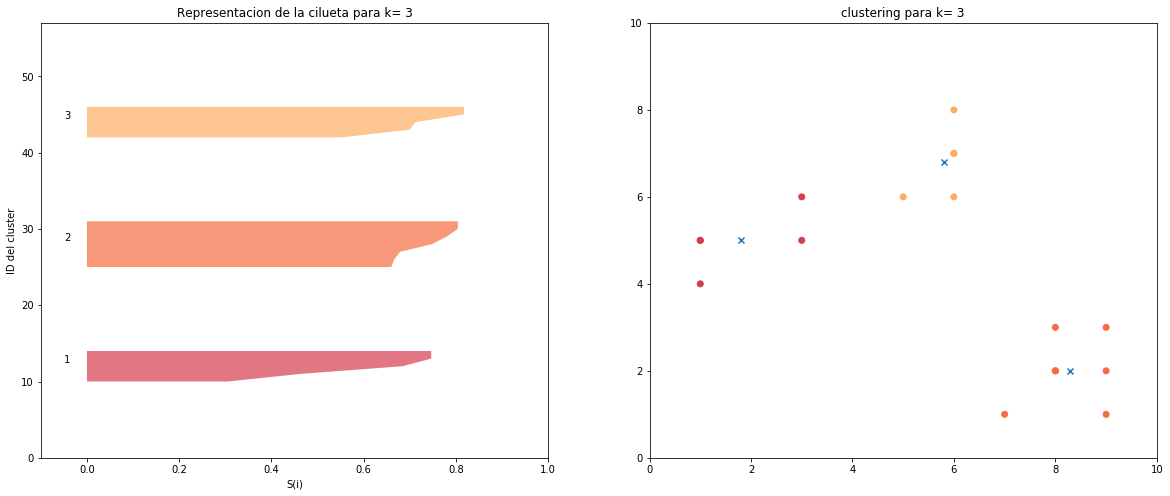

* para k = 4  el promedio de la silueta es de : 0.6681975064749085
  -para i =  1 la silueta del cluster vale : 0.7345257364682265
  -para i =  2 la silueta del cluster vale : 0.554000211331934
  -para i =  3 la silueta del cluster vale : 0.5953438170591677
  -para i =  4 la silueta del cluster vale : 0.7109859822787179


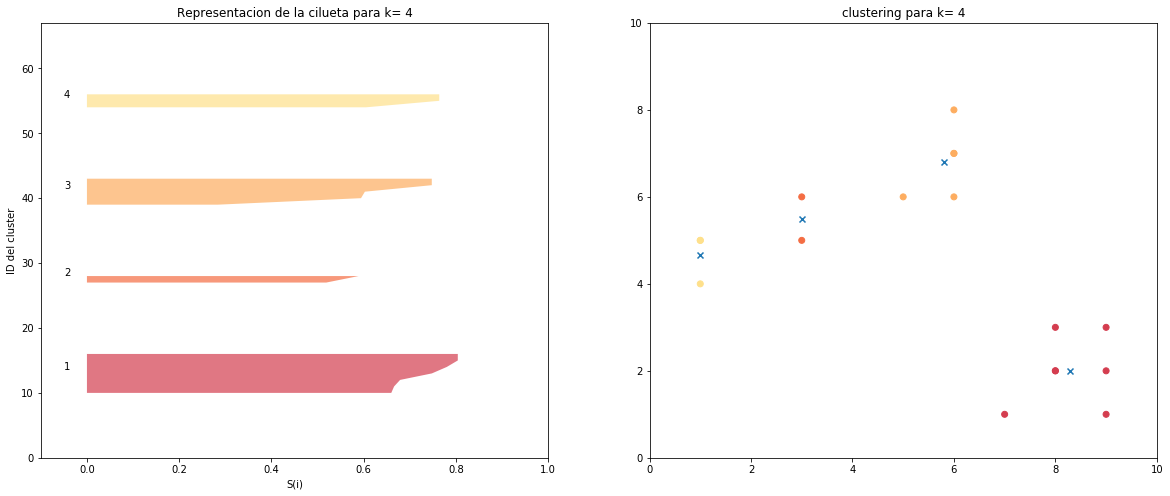

* para k = 5  el promedio de la silueta es de : 0.4990363859196467
  -para i =  1 la silueta del cluster vale : 0.554000211331934
  -para i =  2 la silueta del cluster vale : 0.37765685097302226
  -para i =  3 la silueta del cluster vale : 0.5953438170591677
  -para i =  4 la silueta del cluster vale : 0.7109859822787179
  -para i =  5 la silueta del cluster vale : 0.0


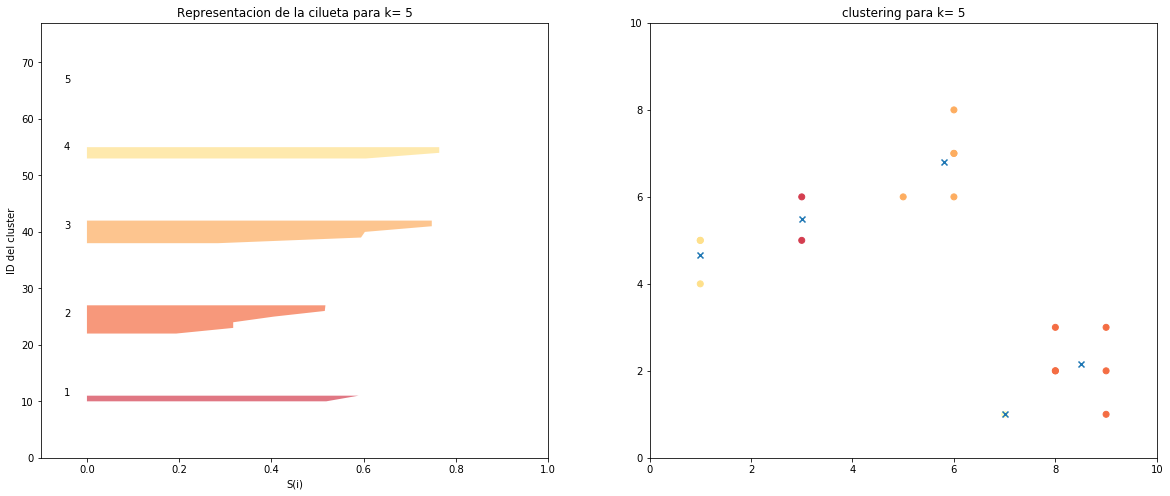

* para k = 6  el promedio de la silueta es de : 0.4215922774342008
  -para i =  1 la silueta del cluster vale : 0.2698039021743969
  -para i =  2 la silueta del cluster vale : 0.7109859822787179
  -para i =  3 la silueta del cluster vale : 0.5664789734180768
  -para i =  4 la silueta del cluster vale : 0.1899052168375926
  -para i =  5 la silueta del cluster vale : 0.554000211331934
  -para i =  6 la silueta del cluster vale : 0.32882042637679976


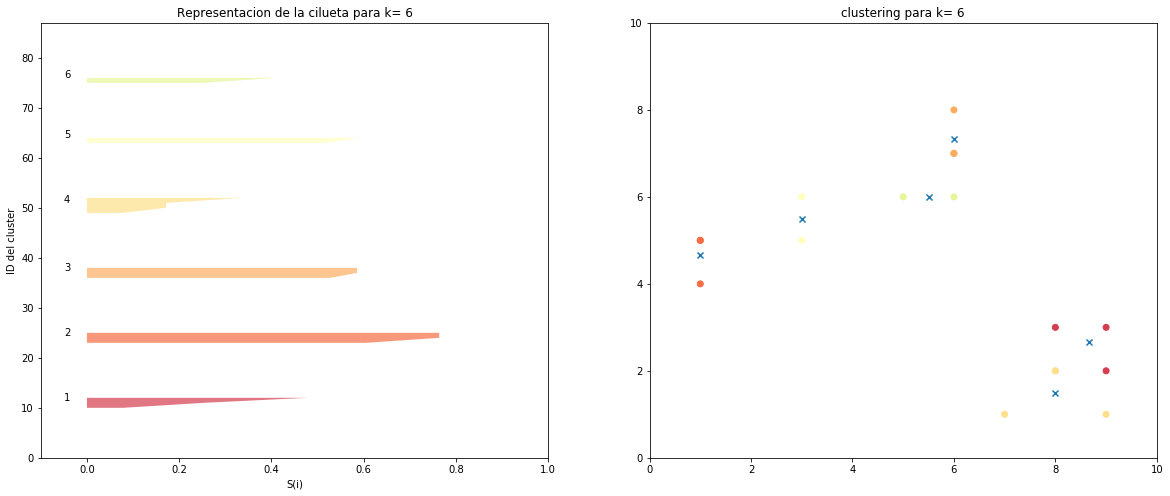

* para k = 7  el promedio de la silueta es de : 0.4355284511970879
  -para i =  1 la silueta del cluster vale : 0.3028895866899326
  -para i =  2 la silueta del cluster vale : 0.32882042637679976
  -para i =  3 la silueta del cluster vale : 0.7109859822787179
  -para i =  4 la silueta del cluster vale : 0.554000211331934
  -para i =  5 la silueta del cluster vale : 0.5664789734180768
  -para i =  6 la silueta del cluster vale : 0.30004208861569454
  -para i =  7 la silueta del cluster vale : 0.0


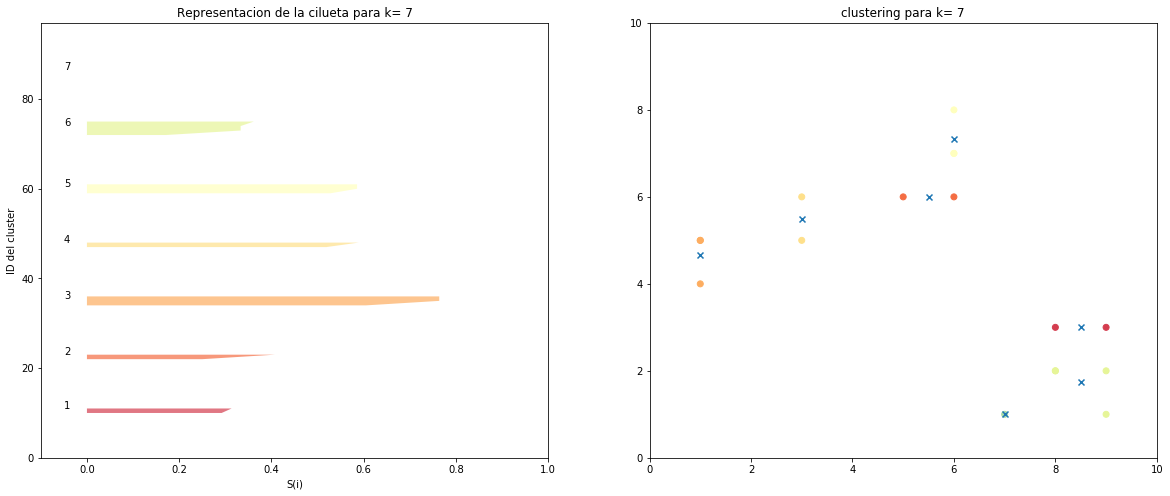

* para k = 8  el promedio de la silueta es de : 0.481401328243221
  -para i =  1 la silueta del cluster vale : 0.14644660940672627
  -para i =  2 la silueta del cluster vale : 0.32882042637679976
  -para i =  3 la silueta del cluster vale : 0.7109859822787179
  -para i =  4 la silueta del cluster vale : 0.14644660940672627
  -para i =  5 la silueta del cluster vale : 1.0
  -para i =  6 la silueta del cluster vale : 0.554000211331934
  -para i =  7 la silueta del cluster vale : 0.5664789734180768
  -para i =  8 la silueta del cluster vale : 0.0


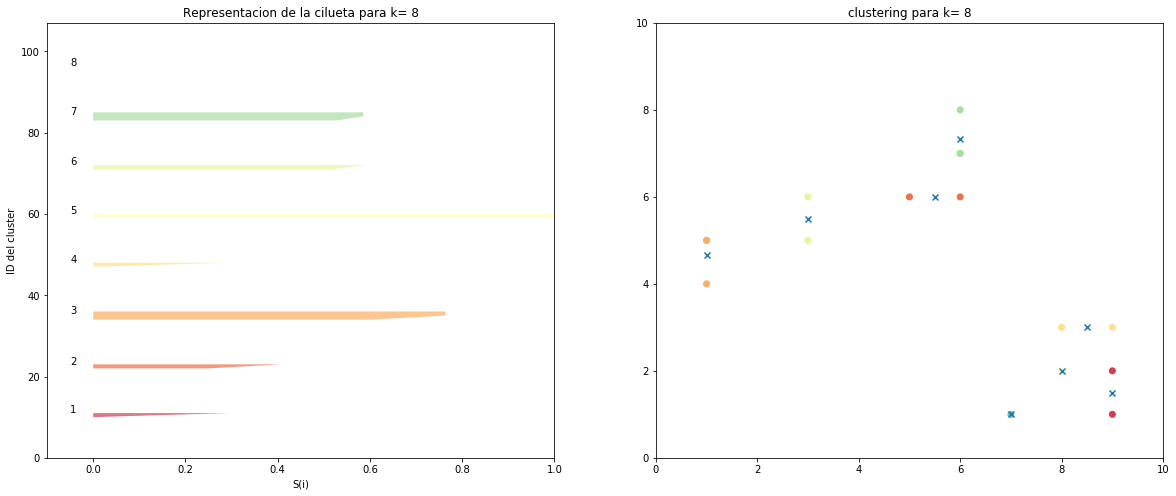

* para k = 9  el promedio de la silueta es de : 0.477625766231787
  -para i =  1 la silueta del cluster vale : 0.0
  -para i =  2 la silueta del cluster vale : 0.14644660940672627
  -para i =  3 la silueta del cluster vale : 0.7109859822787179
  -para i =  4 la silueta del cluster vale : 0.14644660940672627
  -para i =  5 la silueta del cluster vale : 0.14644660940672627
  -para i =  6 la silueta del cluster vale : 0.554000211331934
  -para i =  7 la silueta del cluster vale : 0.0
  -para i =  8 la silueta del cluster vale : 1.0
  -para i =  9 la silueta del cluster vale : 1.0


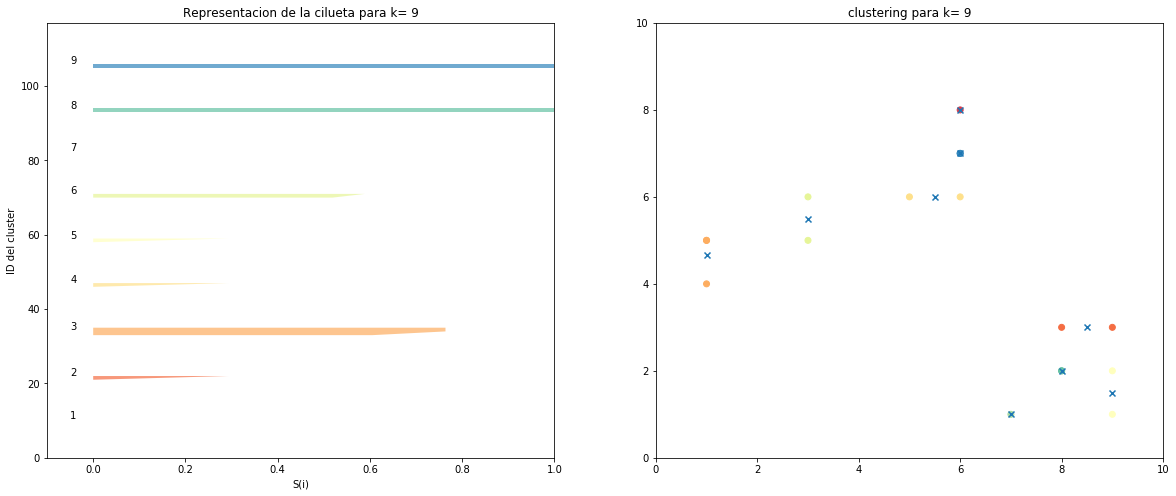

In [32]:
max_k= 10
K = range(1,max_k)
ssw =[] # suma de los cuadrados internos
cmap = cm.get_cmap("Spectral") 
color_palette = [cmap(float(i)/max_k) for i in K]
centroid =[ sum(X)/len(X)for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    
    label_color= [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # por seguridad, no hacemos silueta si k = 1 o k=len(x)
    if 1<k<len(X):
        ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2)= plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        #El primer subplot contendra la silueta, que puede tener calores de -1 a 1 
        #En nuestro caso , ya controlamos que los valores esten entre 01-  y 1 
        axis1.set_xlim([-0.1, 1.])
        # el primer numero del cluster a insertar determinara el tamaño de cada barra
        # el coeficiente (n_cluster + 1)*10 Sera el espacio en clanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0,len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print ("* para k =",k," el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range (k):
            # Agregamos la silueta del cluster i.esimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print ("  -para i = ",i+1,"la silueta del cluster vale :", np.mean(ith_cluster_sv)) 
            #Ordenamos decendientemente las 
            ith_cluster_sv.sort()
            
            #calculamos donde coloar la primera silueta del eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper =y_lower + ith_cluster_size
            
            #elegimo el color del cluster
            color=color_palette[i]
            
            
            #Pintamos la silueta del cluster i-esimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color ,alpha = 0.7)
            
            #etiquetamos dicho cluster con el numero en el centro 
            axis1.text(-0.05, y_lower + 0.5* ith_cluster_size, str (i+1))
            
            #calculamosel numero y_lower para el siguiente cluster grafico 
            
            y_lower= y_upper + 10# dejamos vacias 10 pociciones sin muestra
            
        axis1.set_title("Representacion de la cilueta para k= %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        #fin de la representacion de la silueta
        
    ##plot de los k-meas con los puentos respectivos
    
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("clustering para k= %s"%str(k))
    plt.scatter(x1,x2, c= label_color)
    plt.scatter(centers[0], centers[1], marker="x")
    plt.show()

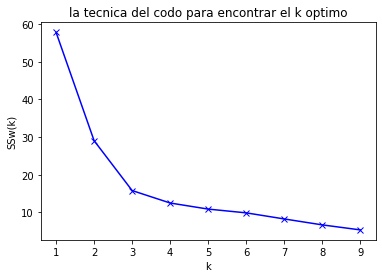

In [37]:
plt.plot(K,ssw ,"bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("la tecnica del codo para encontrar el k optimo")
plt.show()

In [38]:
#representaicon del codo normalizado 

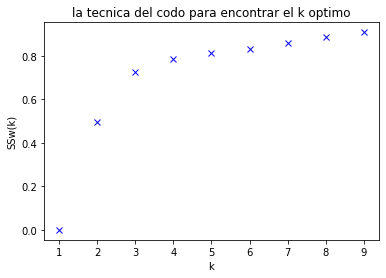

In [39]:
plt.plot(K,1-ssw/sst,"bx")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("la tecnica del codo para encontrar el k optimo")
plt.show()